In [2]:
import os
import pickle
import copy
from bandit_algo import *

import numpy as np
import scipy
import matplotlib.pyplot as plt

### step 1. specifiy a setting

In [3]:
p = '1.0'
d = '50'
T = '10000'
noise_free = 'False'


### step 2. get all result file (including all learning rate scale)

In [4]:
root_path = '../bandits-results'

In [5]:
# find all the directories with regarding the setting we set above
dirs = []
for dirt in os.listdir(root_path):
    splits = dirt.split('-')
    if ('p={}'.format(p) in dirt) and ('T={}'.format(T)==splits[2]) \
        and ('d={}'.format(d) in dirt) and ('noise_free={}'.format(noise_free) in dirt):
        dirs.append(dirt)

In [6]:
algos = {
    'True': {},
    'False': {}
}

for dirt in dirs:
    path = os.path.join(root_path, dirt)
    scale = dirt.split('-')[3].split('=')[1]
    test_flag = dirt.split('-')[5].split('=')[1]
    
    files = os.listdir(path)
    
    if len(files) == 0:
        continue
        
    for file in files:
        print('loading:', os.path.join(path, file))
        f = pickle.load(open(os.path.join(path, file), 'rb'))
        
        algo = file.split('.')[0]
        if algo not in algos[test_flag]:
            algos[test_flag][algo] = {scale: f}
        else:
            algos[test_flag][algo][scale] = f

loading: ../bandits-results/p=1.0-d=50-T=10000-scale=2.0-noise_free=False-test_flag=False/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=5.0-noise_free=False-test_flag=False/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=3.0-noise_free=False-test_flag=True/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=5.0-noise_free=False-test_flag=True/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=4.0-noise_free=False-test_flag=False/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=1.0-noise_free=False-test_flag=False/DPUCB.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=1.0-noise_free=False-test_flag=False/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=4.0-noise_free=False-test_flag=True/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=3.0-noise_free=False-test_flag=False/OFW_peq1.pkl
loading: ../bandits-results/p=1.0-d=50-T=10000-scale=2.0-noise_free=False-test_

### step 3. select the best curves over different lr-scale for each algo

In [7]:
 def collect_result_by_algo(algo, test_flag):
    ### collect all risk/time for each lr-scale
    
    results = algos[test_flag][algo]
    
    iter_dict = {}
    est_error_dict = {}
    time_dict = {}
    regret_dict = {}

    for scale in results.keys():
        res = results[scale]

        iters = []
        est_errors = []
        times = []
        regrets = []
        baselines = []

        for r in res:
            record = copy.copy(r['result']['record'])
            record = np.array(record)
            
            iters.append(record[:, 0])
            est_errors.append(record[:, 1])
            times.append(record[:, 3])
            regrets.append(record[:, 2])
            # baselines.append(r['result']['baseline'])

        # time starts from 0
#         for i in range(len(times)):
#             times = [0] + times
#             regrets = [0] + regrets
#             est_errors = [baseline[i]] + est_errors

        iters = np.array(iters)
        est_errors = np.array(est_errors)
        times = np.array(times)
        regrets = np.array(regrets)
        # baselines = np.array(baselines)

        iter_dict[scale] = iters
        est_error_dict[scale] = copy.copy(est_errors)
        time_dict[scale] = copy.copy(times)
        regret_dict[scale] = copy.copy(regrets)
        # baseline_dict[scale] = copy.copy(baselines)

    return iter_dict, est_error_dict, time_dict, regret_dict # baseline_dict

In [8]:
### plotting
def plot_single_algo(dicts, name, iter_scale=1):
    
    f = plt.figure(figsize=(8,6))

    scales = list(dicts.keys())
    scales = sorted(scales)
    
    for scale in scales:
        data = dicts[scale].astype('float')

        t = data.shape[1]
        x = np.arange(t)
        x = x * iter_scale

        if name == 'regret':
            data = data.cumsum(axis=1)
        y = data.mean(axis=0)
        error = scipy.stats.tstd(data, axis=0)
        # print('finish std')

        plt.plot(x, y, label='lr-scale={:.2f}'.format(float(scale)))
        plt.fill_between(x, y-error, y+error, alpha=0.2)
    
    plt.xlabel('#iteration', fontsize=18)
    plt.ylabel(name, fontsize=18)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

    setting = 'p={} d={} T={} noise_free={}'.format(p, d, T, noise_free)
    plt.title('{}\n{}\nn_obs:{}'.format(setting, algo, data.shape[1]), fontsize=20)

    plt.grid()
    plt.legend(fontsize=12)
    plt.show()


### step 4. Plotting for algos

In [9]:
algo = 'DPUCB'
iter_dict, est_error_dict, time_dict, regret_dict = collect_result_by_algo(algo, test_flag='True')

/tmp/ipykernel_1010603/240974827.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  record = np.array(record)


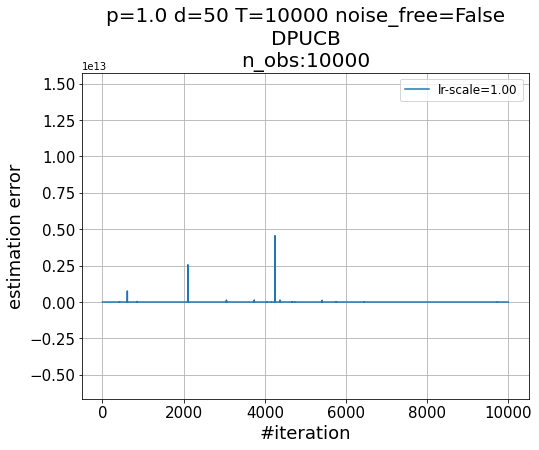

In [10]:
dicts = est_error_dict
name = 'estimation error'
iter_scale = 1
plot_single_algo(dicts, name, iter_scale=iter_scale)

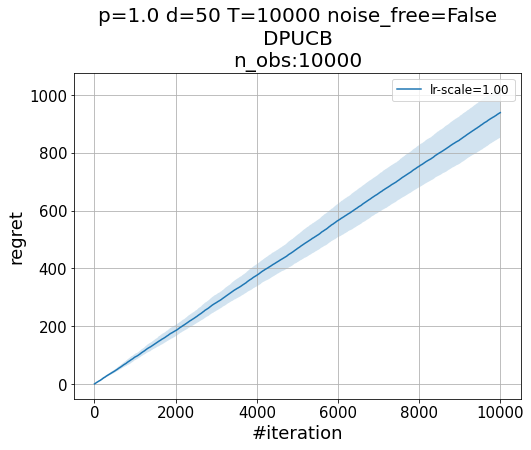

In [11]:
dicts = regret_dict
name = 'regret'
iter_scale = 1
plot_single_algo(dicts, name, iter_scale=iter_scale)

In [12]:
algo = 'OFW_peq1'
iter_dict, est_error_dict, time_dict, regret_dict = collect_result_by_algo(algo, test_flag='True')

/tmp/ipykernel_1010603/240974827.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  record = np.array(record)


In [13]:
np.isnan(est_error_dict['3.0'].astype('float'))# np.isnan(est_error_dict['3.0'])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

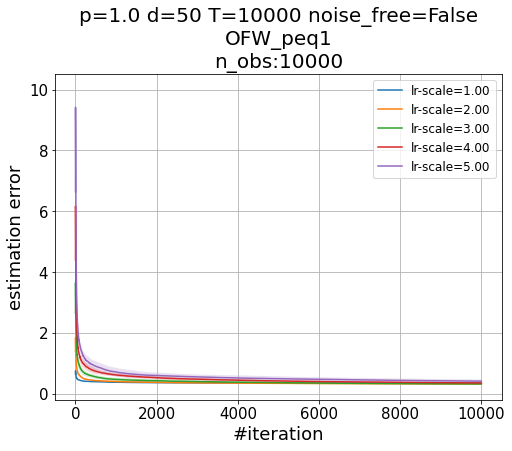

In [14]:
dicts = est_error_dict
name = 'estimation error'
iter_scale = 1
plot_single_algo(dicts, name, iter_scale=iter_scale)

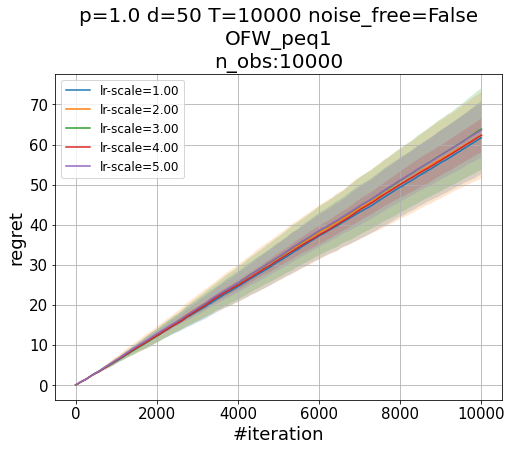

In [15]:
dicts = regret_dict
name = 'regret'
iter_scale = 1
plot_single_algo(dicts, name, iter_scale=iter_scale)

### Step 5. Algorithm comparison

In [16]:
best_setting = {
    'DPUCB': '1.0',
    'OFW_peq1': '1.0',
}

target = 'regret' # regret or est_error

/tmp/ipykernel_1010603/240974827.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  record = np.array(record)
/tmp/ipykernel_1010603/240974827.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  record = np.array(record)


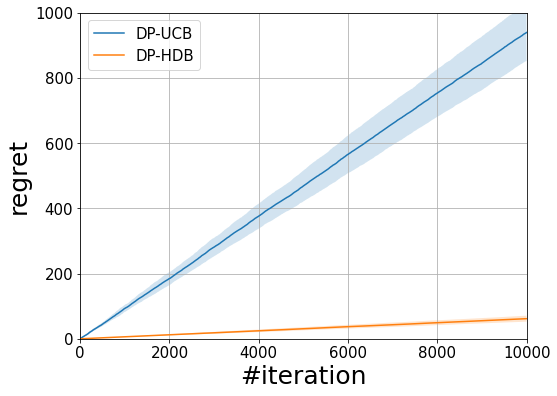

In [18]:
f = plt.figure(figsize=(8,6))

for algo in best_setting:
    
    scale = best_setting[algo]
    
    iter_dict, est_error_dict, time_dict, regret_dict = collect_result_by_algo(algo, 'True')
    
    est_error = est_error_dict[scale].astype('float')
    regret = regret_dict[scale].astype('float')
    
    
    if target == 'est_error':
        data = est_error_dict[scale].astype('float')
        
    elif target == 'regret':
        data = regret_dict[scale].astype('float')
        data = data.cumsum(axis=1)

    t = data.shape[1]
    x = np.arange(t)
    x = x * iter_scale
    
    y = data.mean(axis=0)
    error = scipy.stats.tstd(data, axis=0)
    
    if algo.split('_')[0] == 'OFW':
        plt.plot(x, y, label='DP-HDB')
    else:
        plt.plot(x, y, label='DP-UCB')
    plt.fill_between(x, y-error, y+error, alpha=0.2)
        
plt.xlabel('#iteration', fontsize=25)
plt.ylabel(target, fontsize=25)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlim(0, 10000)
plt.ylim((0, 1000))


setting = 'p={} d={} T={} noise_free={}'.format(p, d, T, noise_free)
# plt.title('{}'.format(setting), fontsize=20)
plt.grid()
plt.legend(fontsize=15)
plt.savefig('../preprint/figures/bandit.pdf')
plt.show()